<a href="https://colab.research.google.com/github/ridwanfirdaus96/k-means_clustering/blob/master/movie_k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas.util.testing as tm
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('movies_metadata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [11]:
df = df[['budget','revenue','runtime','vote_count','vote_average','title']]

In [12]:
df.head()


,budget,revenue,runtime,vote_count,vote_average,title
0,30000000,373554033.0,81.0,5415.0,7.7,Toy Story
1,65000000,262797249.0,104.0,2413.0,6.9,Jumanji
2,0,0.0,101.0,92.0,6.5,Grumpier Old Men
3,16000000,81452156.0,127.0,34.0,6.1,Waiting to Exhale
4,0,76578911.0,106.0,173.0,5.7,Father of the Bride Part II


In [15]:
df.isna().sum()
#df.dropna(inplace=True)


budget          0
revenue         0
runtime         0
vote_count      0
vote_average    0
title           0
dtype: int64

In [16]:
df['vote_count'].describe()

count    45203.000000
mean       110.506515
std        492.638190
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

In [17]:
len(df)

45203

In [18]:
df2 = df[df['vote_count'] > 30]

In [19]:
len(df),len(df2)

(45203, 12178)

In [21]:
df2.isna().sum()

budget          0
revenue         0
runtime         0
vote_count      0
vote_average    0
title           0
dtype: int64

In [22]:
df2.head()

,budget,revenue,runtime,vote_count,vote_average,title
0,30000000,373554033.0,81.0,5415.0,7.7,Toy Story
1,65000000,262797249.0,104.0,2413.0,6.9,Jumanji
2,0,0.0,101.0,92.0,6.5,Grumpier Old Men
3,16000000,81452156.0,127.0,34.0,6.1,Waiting to Exhale
4,0,76578911.0,106.0,173.0,5.7,Father of the Bride Part II


In [23]:
from sklearn import preprocessing

In [25]:
minmax=preprocessing.MinMaxScaler().fit_transform(df2.drop('title',axis=1))

In [26]:
minmax

array([[7.89473684e-02, 1.33988060e-01, 9.23603193e-02, 3.83366562e-01,
        8.10526316e-01],
       [1.71052632e-01, 9.42613127e-02, 1.18586089e-01, 1.69609798e-01,
        7.26315789e-01],
       [0.00000000e+00, 0.00000000e+00, 1.15165336e-01, 4.34349188e-03,
        6.84210526e-01],
       ...,
       [0.00000000e+00, 0.00000000e+00, 9.46408210e-02, 4.27228710e-04,
        6.52631579e-01],
       [0.00000000e+00, 0.00000000e+00, 4.56100342e-03, 8.18855027e-03,
        8.73684211e-01],
       [0.00000000e+00, 0.00000000e+00, 1.15165336e-01, 8.11734549e-03,
        5.47368421e-01]])

In [27]:
df3 = pd.DataFrame(minmax, index=df2.index, columns=df2.columns[:-1])

In [28]:
df3

,budget,revenue,runtime,vote_count,vote_average
0,0.078947,0.133988,0.092360,0.383367,0.810526
1,0.171053,0.094261,0.118586,0.169610,0.726316
2,0.000000,0.000000,0.115165,0.004343,0.684211
3,0.042105,0.029216,0.144812,0.000214,0.642105
4,0.000000,0.027468,0.120867,0.010111,0.600000
...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053
45373,0.000000,0.000000,0.094641,0.000498,0.631579
45380,0.000000,0.000000,0.094641,0.000427,0.652632
45437,0.000000,0.000000,0.004561,0.008189,0.873684


In [36]:
scr=[]
for i in range(1,20):
  score=KMeans(n_clusters=i).fit(df3).score(df3)
  print(score)
  scr.append(score)

-281.0031098516682
-198.5775352627418
-127.33958398552366
-106.07304224497129
-88.26090644029925
-78.7681661136998
-70.58072638710925
-63.369265183312805
-59.473103937518545
-55.73705240518824
-52.092368082076376
-49.8174127915402
-47.71902026997968
-45.16490115260747
-43.20101080123643
-41.446609958019565
-39.68292919053006
-38.127623328804326
-36.984960928327716


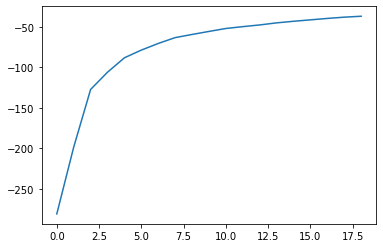

In [38]:
plt.plot(scr)

In [40]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
df3['cluster'] = kmeans.labels_

In [44]:
df3

,budget,revenue,runtime,vote_count,vote_average,clusters,cluster
0,0.078947,0.133988,0.092360,0.383367,0.810526,4,4
1,0.171053,0.094261,0.118586,0.169610,0.726316,2,2
2,0.000000,0.000000,0.115165,0.004343,0.684211,0,0
3,0.042105,0.029216,0.144812,0.000214,0.642105,0,0
4,0.000000,0.027468,0.120867,0.010111,0.600000,0,0
...,...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,0,0
45373,0.000000,0.000000,0.094641,0.000498,0.631579,0,0
45380,0.000000,0.000000,0.094641,0.000427,0.652632,0,0
45437,0.000000,0.000000,0.004561,0.008189,0.873684,1,1


(array([4793.,    0., 3747.,    0.,    0., 1109.,    0., 2271.,    0.,
         258.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <a list of 10 Patch objects>)

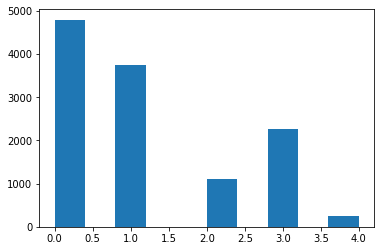

In [46]:
plt.hist(df3['cluster'])

In [47]:
df3

,budget,revenue,runtime,vote_count,vote_average,clusters,cluster
0,0.078947,0.133988,0.092360,0.383367,0.810526,4,4
1,0.171053,0.094261,0.118586,0.169610,0.726316,2,2
2,0.000000,0.000000,0.115165,0.004343,0.684211,0,0
3,0.042105,0.029216,0.144812,0.000214,0.642105,0,0
4,0.000000,0.027468,0.120867,0.010111,0.600000,0,0
...,...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,0,0
45373,0.000000,0.000000,0.094641,0.000498,0.631579,0,0
45380,0.000000,0.000000,0.094641,0.000427,0.652632,0,0
45437,0.000000,0.000000,0.004561,0.008189,0.873684,1,1


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


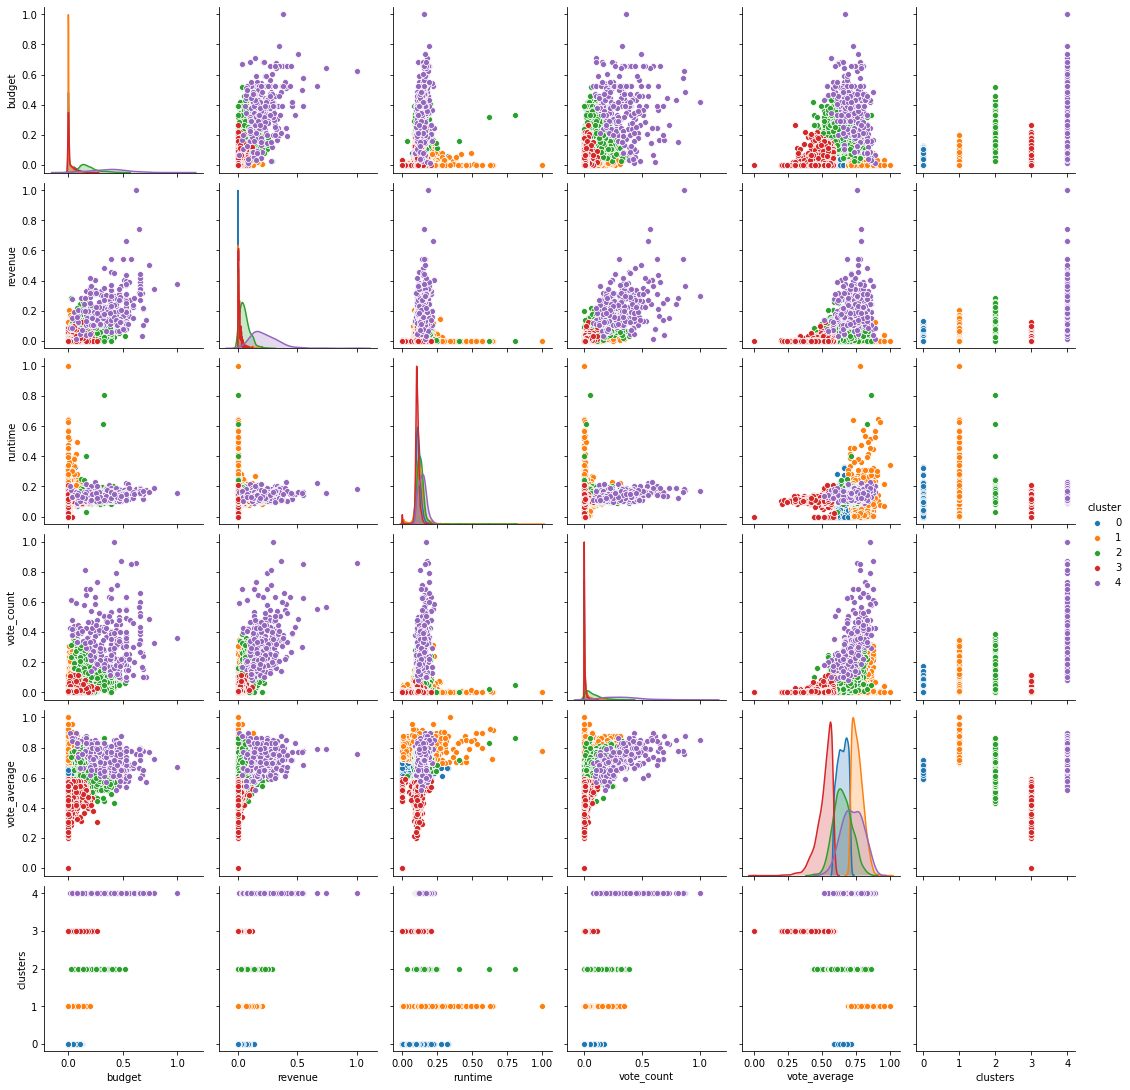

In [55]:
sns.pairplot(df3, hue='cluster')

In [56]:
df3

,budget,revenue,runtime,vote_count,vote_average,clusters,cluster
0,0.078947,0.133988,0.092360,0.383367,0.810526,4,4
1,0.171053,0.094261,0.118586,0.169610,0.726316,2,2
2,0.000000,0.000000,0.115165,0.004343,0.684211,0,0
3,0.042105,0.029216,0.144812,0.000214,0.642105,0,0
4,0.000000,0.027468,0.120867,0.010111,0.600000,0,0
...,...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,0,0
45373,0.000000,0.000000,0.094641,0.000498,0.631579,0,0
45380,0.000000,0.000000,0.094641,0.000427,0.652632,0,0
45437,0.000000,0.000000,0.004561,0.008189,0.873684,1,1


In [57]:
df3['title'] = df2['title']

In [58]:
df3

,budget,revenue,runtime,vote_count,vote_average,clusters,cluster,title
0,0.078947,0.133988,0.092360,0.383367,0.810526,4,4,Toy Story
1,0.171053,0.094261,0.118586,0.169610,0.726316,2,2,Jumanji
2,0.000000,0.000000,0.115165,0.004343,0.684211,0,0,Grumpier Old Men
3,0.042105,0.029216,0.144812,0.000214,0.642105,0,0,Waiting to Exhale
4,0.000000,0.027468,0.120867,0.010111,0.600000,0,0,Father of the Bride Part II
...,...,...,...,...,...,...,...,...
45353,0.000000,0.000000,0.104903,0.000142,0.621053,0,0,Frankenstein Created Woman
45373,0.000000,0.000000,0.094641,0.000498,0.631579,0,0,Take Me
45380,0.000000,0.000000,0.094641,0.000427,0.652632,0,0,The Incredible Jessica James
45437,0.000000,0.000000,0.004561,0.008189,0.873684,1,1,In a Heartbeat
